In [1]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "12/train")
train_features = extractor.transform(train_images, "12/train")
test_features = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_0

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "12/train")
train_diagrams = extractor.transform(train_images, "12/train")
test_diagrams = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/greyscale/diagrams.npy
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 4/72: 2/HeightFiltrar

Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./12/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.9371, 'TOP-2 Accuracy': 0.9751, 'TOP-3 Accuracy': 0.9841, 'TOP-4 Accuracy': 0.9905, 'TOP-5 Accuracy': 0.9929, 'TOP-6 Accuracy': 0.9958, 'TOP-7 Accuracy': 0.9968, 'TOP-8 Accuracy': 0.9981, 'TOP-9 Accuracy': 0.9993, 'AUC-ROC': 0.9966252743309251, 'Precision': 0.9377276258714533, 'Recall': 0.936356502542585, 'F1-score': 0.9365938283058943}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./12/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.9818, 'TOP-2 Accuracy': 0.9936, 'TOP-3 Accuracy': 0.9976, 'TOP-4 Accuracy': 0.9988, 'TOP-5 Accuracy': 0.9992, 'TOP-6 Accuracy': 0.9997, 'TOP-7 Accuracy': 0.9998, 'TOP-8 Accuracy': 1.0, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9996915350354001, 'Precision': 0.9816253524321816

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,Метод k ближайших соседей,0.9371,0.9751,0.9841,0.9905,0.9929,0.9958,0.9968,0.9981,0.9993,0.996625,0.937728,0.936357,0.936594
1,Случайный лес,0.9818,0.9936,0.9976,0.9988,0.9992,0.9997,0.9998,1.0000,1.0000,0.999692,0.981625,0.981554,0.981571
2,Град. бустинг на основе гистограм,0.9755,0.9945,0.9984,0.9992,0.9996,0.9998,0.9999,1.0000,1.0000,0.999572,0.975290,0.975182,0.975216
3,CatBoost,0.9875,0.9972,0.9994,0.9998,0.9999,0.9999,1.0000,1.0000,1.0000,0.999889,0.987427,0.987384,0.987398
4,XGBoost,0.9833,0.9959,0.9984,0.9992,0.9995,0.9997,1.0000,1.0000,1.0000,0.999826,0.983148,0.983106,0.983116
5,Нейронная сеть для тополог. признаков,0.9877,0.9953,0.9965,0.9983,0.9985,0.9993,0.9994,0.9998,0.9998,0.999705,0.987697,0.987653,0.987648
6,Обучаемая векторизация диаграмм,0.4109,0.6031,0.7255,0.8067,0.8704,0.9062,0.9329,0.9643,0.9874,0.801488,0.370038,0.405555,0.374913
7,ResNet18 – базовая модель,0.9862,0.9929,0.9943,0.9952,0.9962,0.9972,0.9984,0.9988,0.9999,0.997025,0.986321,0.986073,0.986146
8,Комбинированная нейронная сеть,0.9903,0.9955,0.9972,0.9977,0.9980,0.9987,0.9992,0.9995,0.9996,0.999138,0.990152,0.990205,0.990162


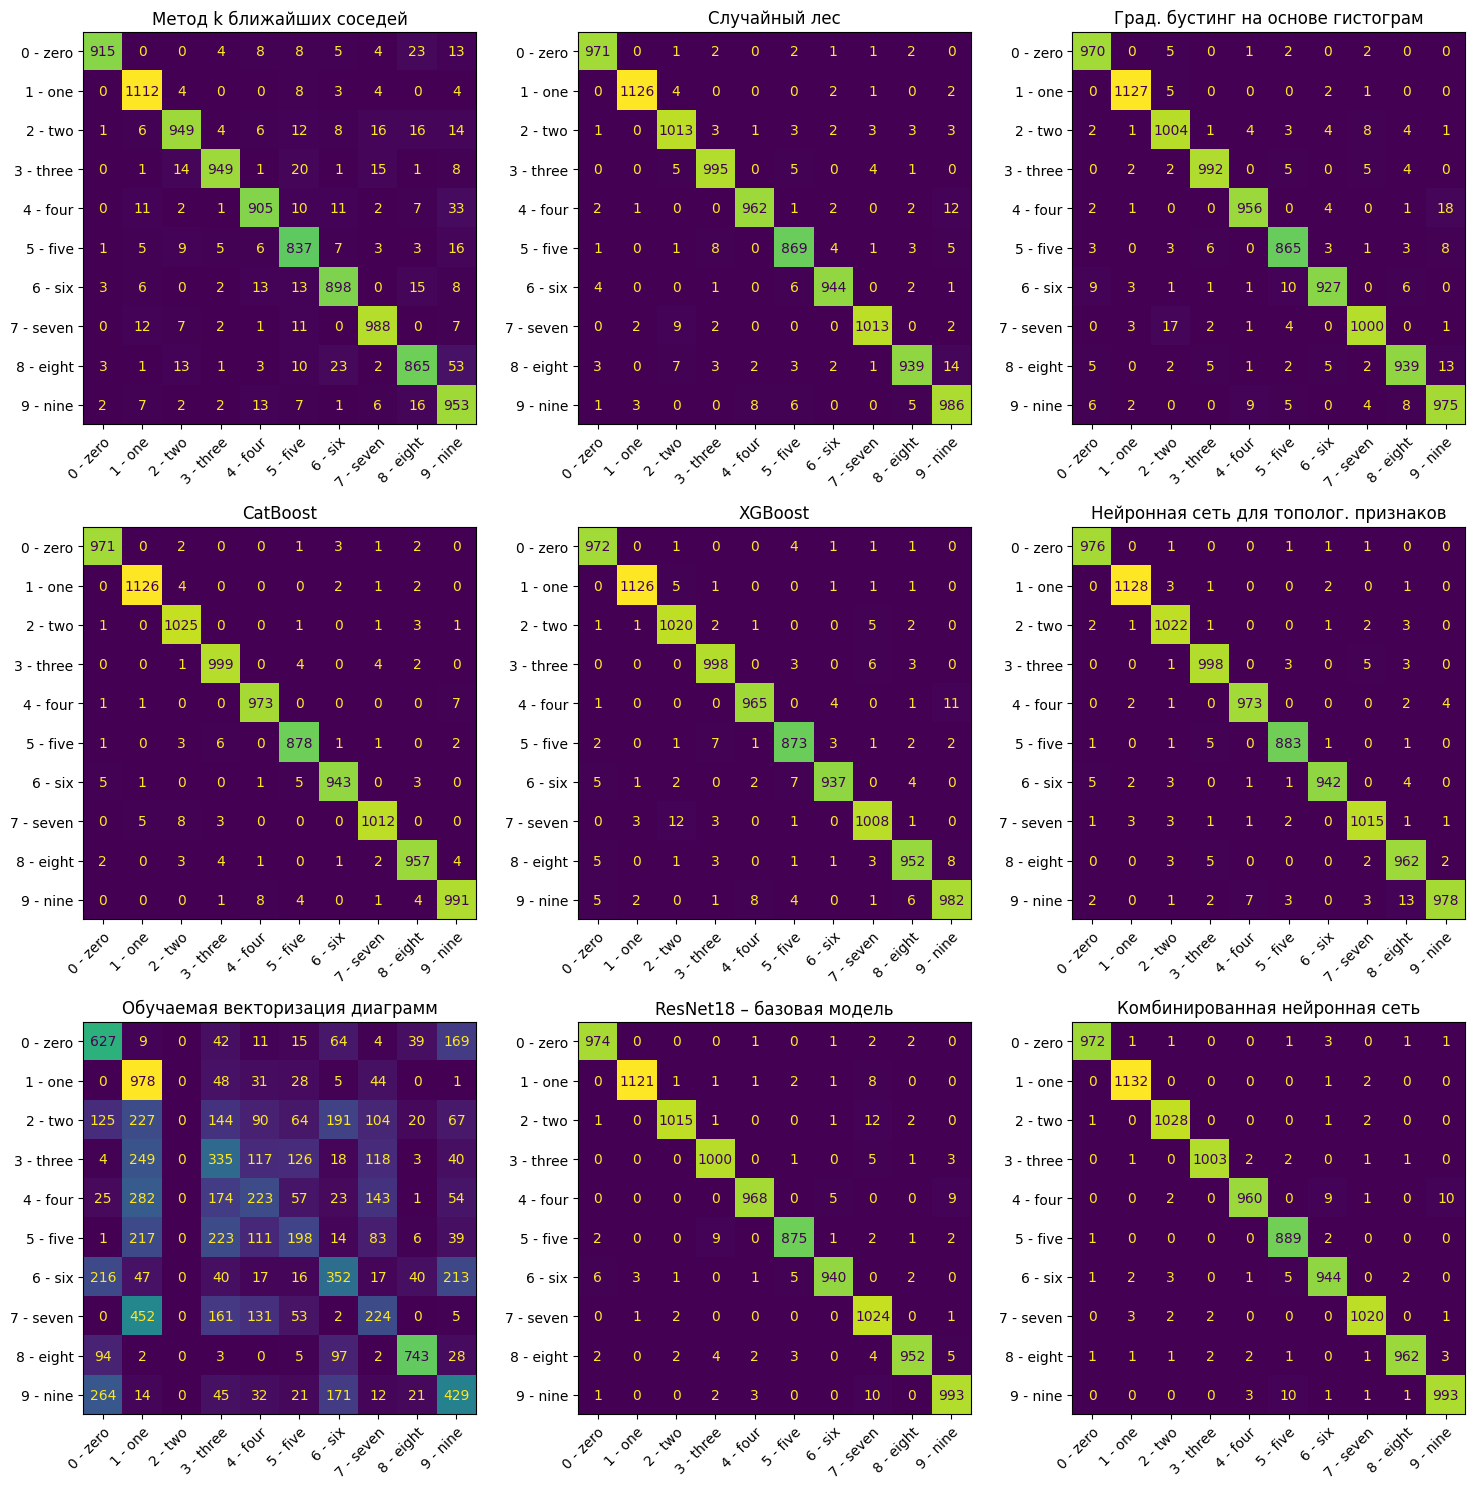

In [ ]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    label_names = train.classes, dump_name = "12/predictions",
    only_get_from_dump = True
)

In [ ]:
import numpy
import torchvision

test = torchvision.datasets.MNIST('mnist', train = False, download = False)

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [5]:
predictions = numpy.argmax(numpy.load("12/predictions/NNClassifier_features.npy"), axis = 1)
part1 = numpy.where((predictions == 8) & (test_labels == 9))
print(part1)

predictions = numpy.argmax(numpy.load("12/predictions/RandomForestClassifier.npy"), axis = 1)
part2 = numpy.where((predictions == 9) & (test_labels == 4))
part3 = numpy.where((predictions == 9) & (test_labels == 8))
print(part2)
print(part3)

(array([ 193,  320,  593,  813,  882, 2189, 4505, 6571, 6592, 6632, 9530,
       9642, 9692], dtype=int64),)
(array([ 447, 1453, 2130, 2447, 3405, 4382, 4860, 5159, 8416, 8527, 9792,
       9922], dtype=int64),)
(array([ 947, 1033, 1782, 2225, 2800, 3263, 3289, 3781, 4497, 4639, 4978,
       6495, 7999, 9110], dtype=int64),)


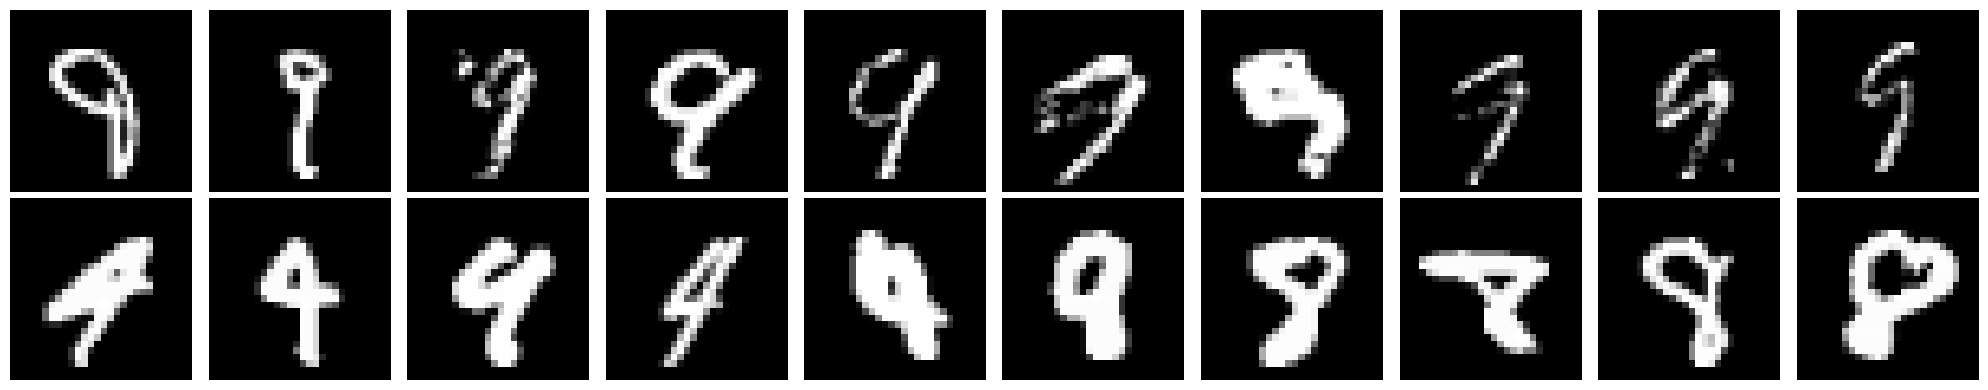

In [14]:

import matplotlib.pyplot as plt
figure, axes = plt.subplots(2, 10, figsize = (20, 4))

part1 = [ 193,  320,  9692,  813,  882, 9642, 4505, 6571, 6592, 6632 ]
for i in range(10):
    axes[0][i].imshow(test_images[part1[i]], cmap = "gray")
    axes[0][i].axis(False)


part2 = [
    447, 4382, 2130, 9792, 8527, 
    947, 3289, 4497, 4639, 7999,
]
for i in range(10):
    axes[1][i].imshow(test_images[part2[i]], cmap = "gray")
    axes[1][i].axis(False)

figure.tight_layout()

plt.savefig("12/predictions/error_examples.svg")
plt.savefig("12/predictions/error_examples.png")